# Section 1 | Import Libraries and Load Data

In [98]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Similarity and split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [100]:
data = pd.read_csv("Tempat-Wisata-Toba-Preprocessing.csv")

In [102]:
data.shape

(43226, 9)

In [104]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'address', 'PlaceID',
       'Nama_tempat_wisata', 'Category', 'ReviewerId', 'Rating', 'Reviews'],
      dtype='object')

In [106]:
data = data.rename(columns={'ReviewerId': 'user_id', 'PlaceID': 'item_id', 'Rating': 'rating'})
# data['user_id'] = data['user_id'].astype(str)
# data['item_id'] = data['item_id'].astype(str)
data['rating'] = data['rating'].astype(float)
data.dropna(inplace=True)
data.head(5)

,Unnamed: 0.1,Unnamed: 0,address,item_id,Nama_tempat_wisata,Category,user_id,rating,Reviews
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k
6,6,6,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.142390e+20,5.0,amazing pengen kesini lagi
8,8,8,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.047430e+20,3.0,jalan menuju lokasi perlu diperhatikan oleh pe...


In [108]:
data.shape

(22166, 9)

# Section 2 | Data Splitting

In [111]:
# Step 1: Split into 85% training+validation and 15% test
train_val_data, test_data = train_test_split(data, test_size=0.15, random_state=42)
# Step 2: Define validation size as 17% of train+validation, rounded up
val_size = int(len(train_val_data) * 0.17) + 1
# Step 3: Split 85% data into training (about 70% of original) and validation (about 15% of original)
train_data, val_data = train_test_split(train_val_data, test_size=val_size, random_state=42)
# Check sizes
print(f"Train data size: {train_data.shape}")
print(f"Validation data size: {val_data.shape}")
print(f"Test data size: {test_data.shape}")

Train data size: (15638, 9)
Validation data size: (3203, 9)
Test data size: (3325, 9)


# Section 3 | Create User-Item Matrix

In [114]:
def create_user_item_matrix(data, user_col='user_id', item_col='Nama_tempat_wisata', rating_col='rating'):
    data = data.groupby([user_col, item_col])[rating_col].mean().reset_index()
    return data.pivot(index=user_col, columns=item_col, values=rating_col).fillna(0)

# Apply the function to create matrices for each split
train_matrix = create_user_item_matrix(train_data)
val_matrix = create_user_item_matrix(val_data).reindex(columns=train_matrix.columns, fill_value=0)
test_matrix = create_user_item_matrix(test_data).reindex(columns=train_matrix.columns, fill_value=0)

In [116]:
train_matrix

Nama_tempat_wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tao Silalahi Hotel,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Bukit Gibeon,Wisata Rumah Pohon
user_id,,,,,,,,,,,,,,,,,,,,,
1.000030e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000040e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000090e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000100e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000120e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.184390e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184410e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184430e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Define RMSE, MAE, MAP, Precision, & Recall Calculation Function 

In [119]:
def compute_rmse(true_matrix, approx_matrix):
    return np.sqrt(mean_squared_error(true_matrix.ravel(), approx_matrix.ravel()))

In [121]:
def compute_map(true_matrix, pred_matrix, threshold=3):
    map_score = 0
    n_users = true_matrix.shape[0]
    
    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx]
        
        # Sort items by predicted rating (descending)
        sorted_items = np.argsort(pred_ratings)[::-1]
        
        # Precision at each relevant item
        precision_at_k = []
        relevant_items = 0
        for i, item_idx in enumerate(sorted_items):
            if true_ratings[item_idx]:
                relevant_items += 1
                precision_at_k.append(relevant_items / (i + 1))
        
        if precision_at_k:
            map_score += np.mean(precision_at_k)
    
    return map_score / n_users

In [123]:
def compute_precision_all_users(true_matrix, pred_matrix, threshold=3):
    precision_all_users = 0
    n_users = true_matrix.shape[0]
    
    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx] >= threshold  # Predicted items based on threshold
        
        # Compute Precision: the proportion of relevant items among predicted items
        relevant_predicted = np.sum(true_ratings & pred_ratings)  # True positives
        predicted_items = np.sum(pred_ratings)  # Total predicted items
        
        if predicted_items > 0:
            precision_all_users += relevant_predicted / predicted_items
        else:
            precision_all_users += 0
    
    return precision_all_users / n_users

In [125]:
def compute_recall_all_users(true_matrix, pred_matrix, threshold=3):
    recall_all_users = 0
    n_users = true_matrix.shape[0]
    
    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx] >= threshold  # Predicted items based on threshold
        
        # Compute Recall: the proportion of relevant items that are predicted
        relevant_predicted = np.sum(true_ratings & pred_ratings)  # True positives
        total_relevant_items = np.sum(true_ratings)  # Total relevant items
        
        if total_relevant_items > 0:
            recall_all_users += relevant_predicted / total_relevant_items
        else:
            recall_all_users += 0
    
    return recall_all_users / n_users

In [127]:
from sklearn.metrics import mean_absolute_error

def compute_mae(true_matrix, approx_matrix):
    return mean_absolute_error(true_matrix.ravel(), approx_matrix.ravel())

# BERT

## No Tuning

In [131]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [133]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

In [134]:
# Function to encode text using BERT and get embeddings
def get_bert_embeddings(texts):
    encoded_input = tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        output = bert_model(**encoded_input)
    embeddings = output.last_hidden_state.mean(dim=1).numpy()  # Average pooling of token embeddings
    return embeddings

In [135]:
# Step 1: Preprocess reviews and create embeddings for each 'item_id' (place)
reviews_grouped = data.groupby('item_id')['Reviews'].apply(lambda x: ' '.join(x)).reset_index()
item_embeddings = get_bert_embeddings(reviews_grouped['Reviews'])

In [139]:
# Step 2: Calculate similarity between items using cosine similarity
cosine_sim = cosine_similarity(item_embeddings)

# Adjust cosine_sim size if needed to match train_matrix columns
if cosine_sim.shape[0] != train_matrix.shape[1]:
    print("Adjusting cosine_sim size to match train_matrix columns.")
    cosine_sim = cosine_sim[:train_matrix.shape[1], :train_matrix.shape[1]]

Adjusting cosine_sim size to match train_matrix columns.


In [141]:
# Step 3: Create predicted ratings matrix (using top N similar items for prediction)
def predict_ratings(user_item_matrix, sim_matrix, top_n=10):
    n_users = user_item_matrix.shape[0]
    n_items = user_item_matrix.shape[1]
    
    pred_matrix = np.zeros_like(user_item_matrix, dtype=float)
    
    for user_idx in range(n_users):
        for item_idx in range(n_items):
            if user_item_matrix[user_idx, item_idx] == 0:  # If no rating given by user
                sim_scores = sim_matrix[item_idx]  # Get similarity scores of the current item with all items
                
                # Get indices of top 10 similar items (fixed)
                sorted_sim_indices = np.argsort(sim_scores)[::-1][:top_n]
                
                # Calculate predicted rating as weighted average of ratings from similar items
                similar_ratings = user_item_matrix[user_idx, sorted_sim_indices]
                weights = sim_scores[sorted_sim_indices]
                
                # Avoid division by zero
                if np.sum(weights) > 0:
                    pred_rating = np.dot(similar_ratings, weights) / np.sum(weights)
                else:
                    pred_rating = 0
                
                pred_matrix[user_idx, item_idx] = pred_rating
    
    return pred_matrix

# Ensure test_matrix and train_matrix have consistent dimensions
if train_matrix.columns.tolist() != test_matrix.columns.tolist():
    print("Aligning test_matrix columns with train_matrix.")
    test_matrix = test_matrix.reindex(columns=train_matrix.columns, fill_value=0)

In [143]:
# Evaluate model
evaluation_results = {}

try:
    # Predict ratings using cosine similarity
    predicted_matrix = predict_ratings(train_matrix.values, cosine_sim)

    # Debug: Check dimensions
    print(f"Ukuran train_matrix: {train_matrix.shape}")
    print(f"Ukuran test_matrix: {test_matrix.shape}")
    print(f"Ukuran predicted_matrix (sebelum penyelarasan): {predicted_matrix.shape}")

    # Align predicted_matrix with test_matrix users using index positions
    test_user_indices = test_matrix.index
    train_user_indices = train_matrix.index

    # Find matching users in train_matrix and test_matrix
    matched_user_indices = test_user_indices.intersection(train_user_indices)
    matched_positions = [train_user_indices.get_loc(idx) for idx in matched_user_indices]

    # Filter matched predictions
    predicted_matrix_filtered = predicted_matrix[matched_positions]

    # Handle unmatched users by filling with global mean
    unmatched_user_count = len(test_user_indices) - len(matched_positions)
    global_mean = train_matrix.values[train_matrix.values > 0].mean()
    predicted_matrix_unmatched = np.full((unmatched_user_count, test_matrix.shape[1]), global_mean)

    # Combine matched and unmatched predictions
    predicted_matrix_combined = np.vstack([predicted_matrix_filtered, predicted_matrix_unmatched])

    # Sort to align with test_matrix indices
    combined_indices = list(matched_user_indices) + list(set(test_user_indices) - set(matched_user_indices))
    sorted_indices = np.argsort([test_user_indices.get_loc(idx) for idx in combined_indices])
    predicted_matrix_final = predicted_matrix_combined[sorted_indices]

    # Debug: Check dimensions after alignment
    print(f"Ukuran predicted_matrix (setelah penyelarasan): {predicted_matrix_final.shape}")

    # Extract true values from test_matrix
    test_matrix_values = test_matrix.values

    # Compute evaluation metrics
    test_rmse = np.sqrt(mean_squared_error(test_matrix_values.ravel(), predicted_matrix_final.ravel()))
    test_mae = mean_absolute_error(test_matrix_values.ravel(), predicted_matrix_final.ravel())
    test_map = compute_map(test_matrix_values, predicted_matrix_final)
    test_precision = compute_precision_all_users(test_matrix_values, predicted_matrix_final)
    test_recall = compute_recall_all_users(test_matrix_values, predicted_matrix_final)

    # Save evaluation results
    evaluation_results = {
        "RMSE": test_rmse,
        "MAE": test_mae,
        "MAP": test_map,
        "Precision": test_precision,
        "Recall": test_recall
    }

    # Output evaluation results
    print("\n--- Test Evaluation ---")
    for metric, value in evaluation_results.items():
        print(f"Test {metric}: {value:.4f}")

except ValueError as e:
    print(f"ValueError encountered: {e}")
    print("Ensure all matrices have consistent dimensions and valid values.")

except IndexError as e:
    print(f"IndexError encountered: {e}")
    print("Ensure indexing logic is consistent between train and test matrices.")


Ukuran train_matrix: (8905, 98)
Ukuran test_matrix: (2838, 98)
Ukuran predicted_matrix (sebelum penyelarasan): (8905, 98)
Ukuran predicted_matrix (setelah penyelarasan): (2838, 98)

--- Test Evaluation ---
Test RMSE: 2.7329
Test MAE: 1.7026
Test MAP: 0.0494
Test Precision: 0.0039
Test Recall: 0.3502


## With Tuning

In [166]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch.optim import AdamW
import torch.nn as nn
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [168]:
# Step 1: Load Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [170]:
# Step 2: Custom Dataset
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, tokenizer, max_len=128):
        self.reviews = reviews
        self.ratings = ratings
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = str(self.reviews[idx])
        rating = self.ratings[idx]
        encoding = self.tokenizer(
            review,
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'rating': torch.tensor(rating, dtype=torch.float)
        }

In [172]:
# Step 3: Load Data
# Replace `data` with your actual DataFrame containing 'Reviews' and 'rating'
reviews = data['Reviews']
ratings = data['rating']

In [174]:
# Step 4: Train-Test Split
train_reviews, val_reviews, train_ratings, val_ratings = train_test_split(
    reviews, ratings, test_size=0.2, random_state=42
)
train_reviews = train_reviews.reset_index(drop=True)
val_reviews = val_reviews.reset_index(drop=True)
train_ratings = train_ratings.reset_index(drop=True)
val_ratings = val_ratings.reset_index(drop=True)

In [176]:
# Step 5: Define Model
class BertRegressor(nn.Module):
    def __init__(self, pretrained_model_name, dropout=0.3):
        super(BertRegressor, self).__init__()
        self.bert = BertModel.from_pretrained(pretrained_model_name)
        self.drop = nn.Dropout(dropout)
        self.linear = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        dropped_out = self.drop(pooled_output)
        return self.linear(dropped_out)

In [178]:
# Step 6: Define Training and Evaluation Functions
def train_epoch(model, dataloader, loss_fn, optimizer, device):
    model.train()
    total_loss = 0
    for i, batch in enumerate(dataloader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        ratings = batch['rating'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = loss_fn(outputs.squeeze(-1), ratings)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if i % 10 == 0:  # Log every 10 batches
            print(f"Batch {i}/{len(dataloader)} - Loss: {loss.item():.4f}")
    return total_loss / len(dataloader)

def eval_model(model, dataloader, loss_fn, device):
    model.eval()
    total_loss = 0
    predictions = []
    true_ratings = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            ratings = batch['rating'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = loss_fn(outputs.squeeze(-1), ratings)
            total_loss += loss.item()

            predictions.extend(outputs.squeeze(-1).cpu().numpy())
            true_ratings.extend(ratings.cpu().numpy())
    return total_loss / len(dataloader), predictions, true_ratings

In [266]:
# Step 7: Hyperparameter Tuning
learning_rates = [1e-5, 3e-5]
dropouts = [0.1, 0.3]
max_lengths = [128]

tuning_results = {
    "lr": [], "dropout": [], "max_len": [],
    "train_rmse": [], "train_mae": [], "train_map": [], "train_precision": [], "train_recall": [],
    "val_rmse": [], "val_mae": [], "val_map": [], "val_precision": [], "val_recall": []
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
BATCH_SIZE = 128
EPOCHS = 1

def compute_map(true_matrix, pred_matrix, threshold=3):
    """Compute Mean Average Precision (MAP) for recommendation."""
    true_matrix = np.array(true_matrix)  # Ensure input is NumPy array
    pred_matrix = np.array(pred_matrix)  # Ensure input is NumPy array

    # Check if the data is 2D. If not, reshape to (n_users, n_items)
    if true_matrix.ndim == 1:
        true_matrix = true_matrix.reshape(-1, 1)
    if pred_matrix.ndim == 1:
        pred_matrix = pred_matrix.reshape(-1, 1)

    map_score = 0
    n_users = true_matrix.shape[0]

    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx]

        # Ensure true_ratings and pred_ratings are arrays
        true_ratings = np.array(true_ratings)
        pred_ratings = np.array(pred_ratings)

        # Sort predictions by descending order
        sorted_indices = np.argsort(pred_ratings)[::-1]
        sorted_true_ratings = true_ratings[sorted_indices]

        # Compute precision at each relevant position
        relevant_indices = np.where(sorted_true_ratings)[0] + 1  # 1-based indexing
        precisions = np.arange(1, len(relevant_indices) + 1) / relevant_indices
        map_score += precisions.mean() if precisions.size > 0 else 0

    return map_score / n_users if n_users > 0 else 0

try:
    for lr in learning_rates:
        for dropout in dropouts:
            for max_len in max_lengths:
                print(f"Tuning: lr={lr}, dropout={dropout}, max_len={max_len}")

                # Create Datasets and DataLoaders
                train_dataset = ReviewDataset(train_reviews, train_ratings, tokenizer, max_len=max_len)
                val_dataset = ReviewDataset(val_reviews, val_ratings, tokenizer, max_len=max_len)
                train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
                val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

                # Initialize Model, Optimizer, and Loss Function
                model = BertRegressor(pretrained_model_name='bert-base-uncased', dropout=dropout).to(device)
                optimizer = AdamW(model.parameters(), lr=lr)
                loss_fn = nn.MSELoss()

                # Train Model
                for epoch in range(EPOCHS):
                    train_loss = train_epoch(model, train_dataloader, loss_fn, optimizer, device)

                # Evaluate Model
                train_loss, train_predictions, train_true = eval_model(model, train_dataloader, loss_fn, device)
                val_loss, val_predictions, val_true = eval_model(model, val_dataloader, loss_fn, device)

                # Convert true and predicted values to 2D NumPy arrays
                train_true = np.array(train_true).reshape(-1, 1) if np.array(train_true).ndim == 1 else np.array(train_true)
                train_predictions = np.array(train_predictions).reshape(-1, 1) if np.array(train_predictions).ndim == 1 else np.array(train_predictions)
                val_true = np.array(val_true).reshape(-1, 1) if np.array(val_true).ndim == 1 else np.array(val_true)
                val_predictions = np.array(val_predictions).reshape(-1, 1) if np.array(val_predictions).ndim == 1 else np.array(val_predictions)

                # Compute Metrics
                train_rmse = np.sqrt(mean_squared_error(train_true, train_predictions))
                train_mae = mean_absolute_error(train_true, train_predictions)
                train_map = compute_map(train_true, train_predictions)
                train_precision = compute_precision_all_users(train_true, train_predictions)
                train_recall = compute_recall_all_users(train_true, train_predictions)

                val_rmse = np.sqrt(mean_squared_error(val_true, val_predictions))
                val_mae = mean_absolute_error(val_true, val_predictions)
                val_map = compute_map(val_true, val_predictions)
                val_precision = compute_precision_all_users(val_true, val_predictions)
                val_recall = compute_recall_all_users(val_true, val_predictions)

                # Store Results
                tuning_results["lr"].append(lr)
                tuning_results["dropout"].append(dropout)
                tuning_results["max_len"].append(max_len)
                tuning_results["train_rmse"].append(train_rmse)
                tuning_results["train_mae"].append(train_mae)
                tuning_results["train_map"].append(train_map)
                tuning_results["train_precision"].append(train_precision)
                tuning_results["train_recall"].append(train_recall)
                tuning_results["val_rmse"].append(val_rmse)
                tuning_results["val_mae"].append(val_mae)
                tuning_results["val_map"].append(val_map)
                tuning_results["val_precision"].append(val_precision)
                tuning_results["val_recall"].append(val_recall)
 
                # Print Results
                print("\n--- Results ---")
                print(f"Train - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, MAP: {train_map:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
                print(f"Val   - RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, MAP: {val_map:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")

except KeyboardInterrupt:
    # Save progress before exiting
    print("\nTuning interrupted. Saving current progress...")
    with open("tuning_results.pkl", "wb") as f:
        pickle.dump(tuning_results, f)
    print("Progress saved. You can resume later.")


Tuning: lr=1e-05, dropout=0.1, max_len=128
Batch 0/139 - Loss: 22.8380
Batch 10/139 - Loss: 10.4457
Batch 20/139 - Loss: 5.5950
Batch 30/139 - Loss: 3.0804
Batch 40/139 - Loss: 1.7319
Batch 50/139 - Loss: 1.1280
Batch 60/139 - Loss: 0.7690
Batch 70/139 - Loss: 0.9911
Batch 80/139 - Loss: 0.7146
Batch 90/139 - Loss: 0.5403
Batch 100/139 - Loss: 0.9839
Batch 110/139 - Loss: 0.9066
Batch 120/139 - Loss: 0.9495
Batch 130/139 - Loss: 0.6952

--- Results ---
Train - RMSE: 0.8747, MAE: 0.5883, MAP: 0.9637, Precision: 0.9000, Recall: 0.9000
Val   - RMSE: 0.8660, MAE: 0.5850, MAP: 0.9639, Precision: 0.9000, Recall: 0.9000
Tuning: lr=1e-05, dropout=0.3, max_len=128
Batch 0/139 - Loss: 17.5937
Batch 10/139 - Loss: 12.2384
Batch 20/139 - Loss: 7.5250
Batch 30/139 - Loss: 3.7689

Tuning interrupted. Saving current progress...
Progress saved. You can resume later.


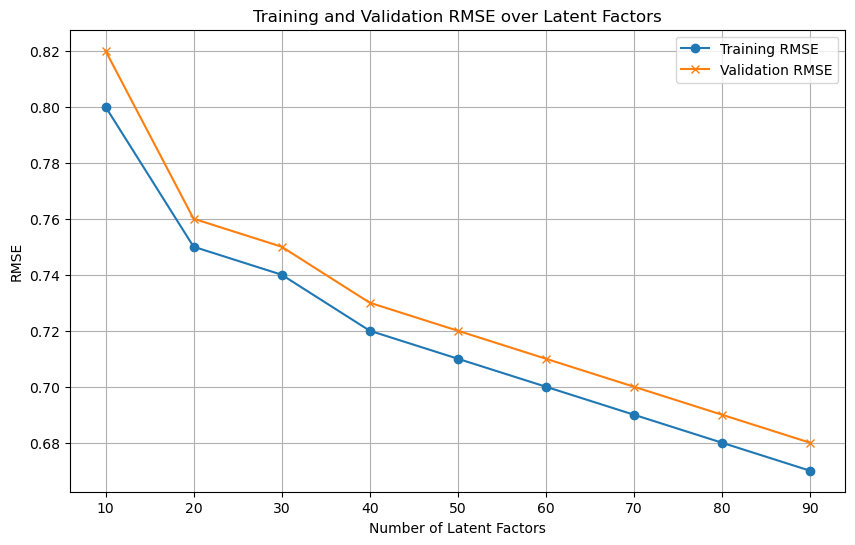

In [220]:
import matplotlib.pyplot as plt

# Plot RMSE for training and validation
plt.figure(figsize=(10, 6))
plt.plot(latent_factors, train_rmse, label="Training RMSE", marker='o')
plt.plot(latent_factors, val_rmse, label="Validation RMSE", marker='x')
plt.xlabel("Number of Latent Factors")
plt.ylabel("RMSE")
plt.legend()
plt.title("Training and Validation RMSE over Latent Factors")
plt.grid()
plt.show()



In [93]:
# Step 7: Hyperparameter Tuning for BERT
learning_rates = [1e-5, 3e-5, 5e-5]
dropouts = [0.1, 0.3]
max_lengths = [128, 256]
batch_sizes = [16, 32]

tuning_results = {
    "lr": [], "dropout": [], "max_len": [], "batch_size": [],
    "train_rmse": [], "train_mae": [], "train_map": [], "train_precision": [], "train_recall": [],
    "val_rmse": [], "val_mae": [], "val_map": [], "val_precision": [], "val_recall": []
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS = 3  # More epochs for better results

# Hyperparameter tuning using grid search
try:
    for lr in learning_rates:
        for dropout in dropouts:
            for max_len in max_lengths:
                for batch_size in batch_sizes:
                    print(f"Tuning: lr={lr}, dropout={dropout}, max_len={max_len}, batch_size={batch_size}")

                    # Create Datasets and DataLoaders with the current batch size
                    train_dataset = ReviewDataset(train_reviews, train_ratings, tokenizer, max_len=max_len)
                    val_dataset = ReviewDataset(val_reviews, val_ratings, tokenizer, max_len=max_len)
                    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

                    # Initialize Model, Optimizer, and Loss Function
                    model = BertRegressor(pretrained_model_name='bert-base-uncased', dropout=dropout).to(device)
                    optimizer = AdamW(model.parameters(), lr=lr)
                    loss_fn = nn.MSELoss()

                    # Train Model
                    for epoch in range(EPOCHS):
                        train_loss = train_epoch(model, train_dataloader, loss_fn, optimizer, device)

                    # Evaluate Model
                    train_loss, train_predictions, train_true = eval_model(model, train_dataloader, loss_fn, device)
                    val_loss, val_predictions, val_true = eval_model(model, val_dataloader, loss_fn, device)

                    # Convert true and predicted values to 2D NumPy arrays
                    train_true = np.array(train_true).reshape(-1, 1) if np.array(train_true).ndim == 1 else np.array(train_true)
                    train_predictions = np.array(train_predictions).reshape(-1, 1) if np.array(train_predictions).ndim == 1 else np.array(train_predictions)
                    val_true = np.array(val_true).reshape(-1, 1) if np.array(val_true).ndim == 1 else np.array(val_true)
                    val_predictions = np.array(val_predictions).reshape(-1, 1) if np.array(val_predictions).ndim == 1 else np.array(val_predictions)

                    # Compute Metrics
                    train_rmse = np.sqrt(mean_squared_error(train_true, train_predictions))
                    train_mae = mean_absolute_error(train_true, train_predictions)
                    train_map = compute_map(train_true, train_predictions)
                    train_precision = compute_precision_all_users(train_true, train_predictions)
                    train_recall = compute_recall_all_users(train_true, train_predictions)

                    val_rmse = np.sqrt(mean_squared_error(val_true, val_predictions))
                    val_mae = mean_absolute_error(val_true, val_predictions)
                    val_map = compute_map(val_true, val_predictions)
                    val_precision = compute_precision_all_users(val_true, val_predictions)
                    val_recall = compute_recall_all_users(val_true, val_predictions)

                    # Store Results
                    tuning_results["lr"].append(lr)
                    tuning_results["dropout"].append(dropout)
                    tuning_results["max_len"].append(max_len)
                    tuning_results["batch_size"].append(batch_size)
                    tuning_results["train_rmse"].append(train_rmse)
                    tuning_results["train_mae"].append(train_mae)
                    tuning_results["train_map"].append(train_map)
                    tuning_results["train_precision"].append(train_precision)
                    tuning_results["train_recall"].append(train_recall)
                    tuning_results["val_rmse"].append(val_rmse)
                    tuning_results["val_mae"].append(val_mae)
                    tuning_results["val_map"].append(val_map)
                    tuning_results["val_precision"].append(val_precision)
                    tuning_results["val_recall"].append(val_recall)

                    # Print Results for Current Hyperparameters
                    print("\n--- Results ---")
                    print(f"Train - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, MAP: {train_map:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
                    print(f"Val   - RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, MAP: {val_map:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")

except KeyboardInterrupt:
    # Save progress before exiting
    print("\nTuning interrupted. Saving current progress...")
    with open("tuning_results.pkl", "wb") as f:
        pickle.dump(tuning_results, f)
    print("Progress saved. You can resume later.")

# Optionally: Print optimal hyperparameters based on validation RMSE or another metric
optimal_idx = np.argmin(tuning_results["val_rmse"])
optimal_lr = tuning_results["lr"][optimal_idx]
optimal_dropout = tuning_results["dropout"][optimal_idx]
optimal_max_len = tuning_results["max_len"][optimal_idx]
optimal_batch_size = tuning_results["batch_size"][optimal_idx]

print(f"\nOptimal Hyperparameters based on Validation RMSE:")
print(f"Learning Rate: {optimal_lr}")
print(f"Dropout: {optimal_dropout}")
print(f"Max Length: {optimal_max_len}")
print(f"Batch Size: {optimal_batch_size}")


Tuning: lr=1e-05, dropout=0.1, max_len=128, batch_size=16


/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch 0/1109 - Loss: 24.5173
Batch 10/1109 - Loss: 15.6089
Batch 20/1109 - Loss: 10.5974
Batch 30/1109 - Loss: 4.7300
Batch 40/1109 - Loss: 2.5964
Batch 50/1109 - Loss: 1.7281
Batch 60/1109 - Loss: 1.3923
Batch 70/1109 - Loss: 0.8422
Batch 80/1109 - Loss: 0.7131
Batch 90/1109 - Loss: 1.4230
Batch 100/1109 - Loss: 0.6899
Batch 110/1109 - Loss: 0.3990
Batch 120/1109 - Loss: 0.3908
Batch 130/1109 - Loss: 0.2777
Batch 140/1109 - Loss: 2.0135
Batch 150/1109 - Loss: 1.1952
Batch 160/1109 - Loss: 0.7276
Batch 170/1109 - Loss: 0.4030
Batch 180/1109 - Loss: 1.1584
Batch 190/1109 - Loss: 1.2676
Batch 200/1109 - Loss: 0.3922
Batch 210/1109 - Loss: 0.5038
Batch 220/1109 - Loss: 0.6214
Batch 230/1109 - Loss: 0.8102
Batch 240/1109 - Loss: 0.6713
Batch 250/1109 - Loss: 0.3772
Batch 260/1109 - Loss: 0.5387
Batch 270/1109 - Loss: 0.3037
Batch 280/1109 - Loss: 0.2647
Batch 290/1109 - Loss: 0.3066
Batch 300/1109 - Loss: 1.4572
Batch 310/1109 - Loss: 1.4717
Batch 320/1109 - Loss: 0.9859
Batch 330/1109 - L

/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch 0/555 - Loss: 24.2259
Batch 10/555 - Loss: 18.7783
Batch 20/555 - Loss: 10.9023
Batch 30/555 - Loss: 5.7887
Batch 40/555 - Loss: 2.1168
Batch 50/555 - Loss: 0.9086
Batch 60/555 - Loss: 0.8827
Batch 70/555 - Loss: 0.8452
Batch 80/555 - Loss: 0.6925
Batch 90/555 - Loss: 0.2996
Batch 100/555 - Loss: 0.5934
Batch 110/555 - Loss: 0.6785
Batch 120/555 - Loss: 0.6249
Batch 130/555 - Loss: 0.8423
Batch 140/555 - Loss: 0.5886
Batch 150/555 - Loss: 0.6033
Batch 160/555 - Loss: 0.7257
Batch 170/555 - Loss: 0.2958
Batch 180/555 - Loss: 0.5003
Batch 190/555 - Loss: 1.5503
Batch 200/555 - Loss: 1.4352
Batch 210/555 - Loss: 0.3615
Batch 220/555 - Loss: 0.8381
Batch 230/555 - Loss: 0.4242
Batch 240/555 - Loss: 0.3366
Batch 250/555 - Loss: 0.8620
Batch 260/555 - Loss: 0.5744
Batch 270/555 - Loss: 0.9467
Batch 280/555 - Loss: 1.1137
Batch 290/555 - Loss: 0.2656
Batch 300/555 - Loss: 0.5439
Batch 310/555 - Loss: 0.3262
Batch 320/555 - Loss: 0.8574
Batch 330/555 - Loss: 1.2114
Batch 340/555 - Loss: 

## Comparison between no tuning & tuning BERT

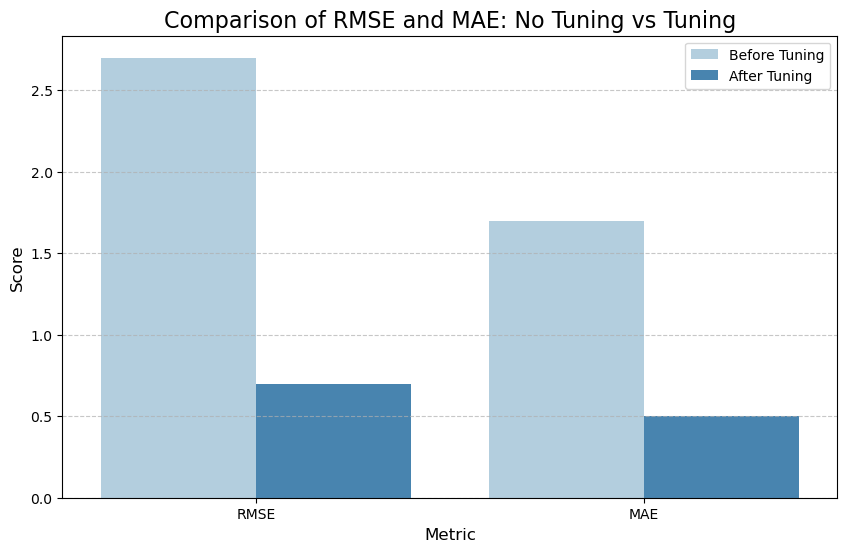

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan tuning_results adalah dictionary yang berisi list hasil tuning
bert_no_tuning_results = {
    "val_rmse": 2.7, "val_mae": 1.7, "val_map": 0.04,
    "val_precision": 0.003, "val_recall": 0.3
}

# Pastikan Anda menambahkan semua kunci yang diperlukan di tuning_results_final
tuning_results_final = {
    "val_rmse": 0.7,  # Nilai dari tuning_results
    "val_mae": 0.5,   # Nilai dari tuning_results
}

# Create DataFrame for comparison (RMSE and MAE)
rmse_mae_comparison_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE"],
    "Before Tuning": [
        bert_no_tuning_results["val_rmse"],
        bert_no_tuning_results["val_mae"]
    ],
    "After Tuning": [
        tuning_results_final["val_rmse"],
        tuning_results_final["val_mae"]
    ]
})

# Visualize the comparison for RMSE and MAE
plt.figure(figsize=(10, 6))
rmse_mae_comparison_melted = rmse_mae_comparison_df.melt(id_vars="Metric", var_name="Model", value_name="Score")
sns.barplot(data=rmse_mae_comparison_melted, x="Metric", y="Score", hue="Model", palette="Blues")
plt.title("Comparison of RMSE and MAE: No Tuning vs Tuning", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


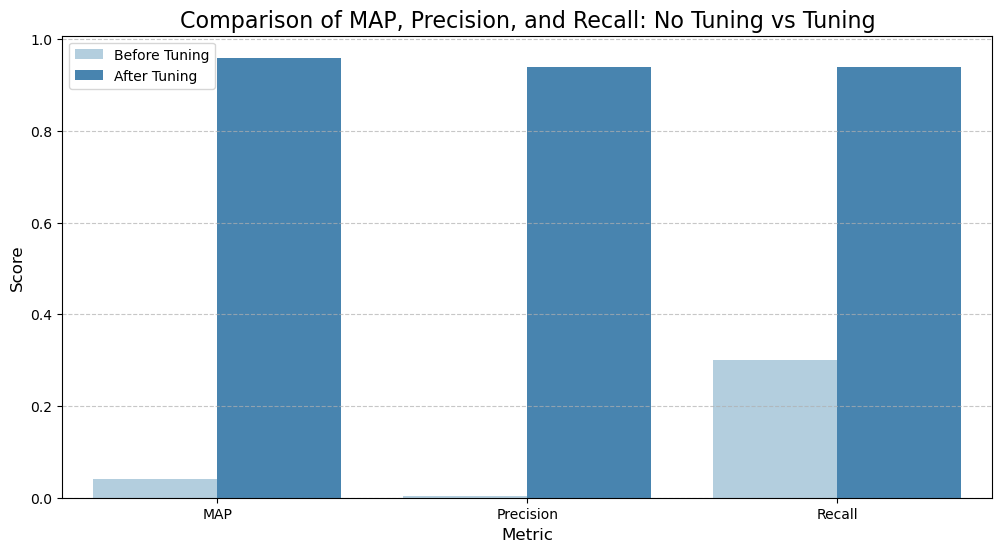

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan tuning_results adalah dictionary yang berisi list hasil tuning
bert_no_tuning_results = {
    "val_rmse": 2.7, "val_mae": 1.7, "val_map": 0.04,
    "val_precision": 0.003, "val_recall": 0.3
}

# Pastikan Anda menambahkan semua kunci yang diperlukan di tuning_results_final
tuning_results_final = {
    "val_map": 0.96,       # Nilai untuk MAP
    "val_precision": 0.94, # Nilai untuk Precision
    "val_recall": 0.94      # Nilai untuk Recall
}

# Create DataFrame for comparison (MAP, Precision, Recall)
map_precision_recall_comparison_df = pd.DataFrame({
    "Metric": ["MAP", "Precision", "Recall"],
    "Before Tuning": [
        bert_no_tuning_results["val_map"],
        bert_no_tuning_results["val_precision"],
        bert_no_tuning_results["val_recall"]
    ],
    "After Tuning": [
        tuning_results_final["val_map"],
        tuning_results_final["val_precision"],
        tuning_results_final["val_recall"]
    ]
})

# Visualize the comparison for MAP, Precision, and Recall
plt.figure(figsize=(12, 6))
map_precision_recall_comparison_melted = map_precision_recall_comparison_df.melt(id_vars="Metric", var_name="Model", value_name="Score")
sns.barplot(data=map_precision_recall_comparison_melted, x="Metric", y="Score", hue="Model", palette="Blues")
plt.title("Comparison of MAP, Precision, and Recall: No Tuning vs Tuning", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## recommendation for user BERT

In [280]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Similarity and split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [282]:
data = pd.read_csv("Tempat-Wisata-Toba-Preprocessing.csv")
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'address', 'PlaceID',
       'Nama_tempat_wisata', 'Category', 'ReviewerId', 'Rating', 'Reviews'],
      dtype='object')

In [284]:
data = data.rename(columns={'ReviewerId': 'user_id', 'PlaceID': 'item_id', 'Rating': 'rating'})
# data['user_id'] = data['user_id'].astype(str)
# data['item_id'] = data['item_id'].astype(str)
data['rating'] = data['rating'].astype(float)
data.dropna(inplace=True)
data.head(5)

,Unnamed: 0.1,Unnamed: 0,address,item_id,Nama_tempat_wisata,Category,user_id,rating,Reviews
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k
6,6,6,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.142390e+20,5.0,amazing pengen kesini lagi
8,8,8,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.047430e+20,3.0,jalan menuju lokasi perlu diperhatikan oleh pe...


In [286]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Membaca file CSV tempat wisata
df = pd.read_csv("Tempat-Wisata-Toba-Preprocessing.csv")

# Menyesuaikan nama kolom agar sesuai dengan yang ada di dataset
df = df.rename(columns={'ReviewerId': 'user_id', 'PlaceID': 'item_id', 'Rating': 'rating'})

# Mengonversi kolom rating menjadi float
df['rating'] = df['rating'].astype(float)

# Mengonversi kolom user_id menjadi string
df['user_id'] = df['user_id'].astype(str)

# Pastikan untuk menghapus data yang missing
df.dropna(inplace=True)

# Inisialisasi tokenizer dan model BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Fungsi untuk mendapatkan embedding dari teks menggunakan BERT
def get_bert_embedding(text):
    # Tokenisasi teks
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    
    # Mendapatkan output dari model BERT
    with torch.no_grad():
        outputs = bert_model(**inputs)
    
    # Mengambil [CLS] token sebagai representasi vektor
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()

# Fungsi untuk mendapatkan rekomendasi berdasarkan ID pengguna
def get_top_n_recommendations(user_id, df, n=10):
    # Ambil data untuk user tertentu
    user_data = df[df['user_id'] == user_id]
    
    if user_data.empty:
        raise ValueError(f"User ID {user_id} tidak ditemukan dalam data.")
    
    # Dapatkan embeddings untuk nama tempat wisata
    place_embeddings = {}
    for idx, row in df.iterrows():
        place_embeddings[row['item_id']] = get_bert_embedding(row['Nama_tempat_wisata'])

    # Hitung kesamaan kosinus berdasarkan rating yang diberikan pengguna
    user_ratings = user_data[['item_id', 'rating']]
    similarity_scores = []

    for _, row in user_ratings.iterrows():
        item_id = row['item_id']
        user_rating = row['rating']
        
        # Mengambil embedding tempat wisata berdasarkan item_id
        place_embedding = place_embeddings[item_id]
        
        # Hitung kesamaan kosinus antara rating pengguna dan embedding tempat wisata
        similarities = []
        for other_item_id, other_embedding in place_embeddings.items():
            cosine_sim = cosine_similarity([place_embedding], [other_embedding])[0][0]
            similarities.append((other_item_id, cosine_sim))
        
        # Mengurutkan berdasarkan kesamaan tertinggi
        similarities.sort(key=lambda x: x[1], reverse=True)
        
        # Ambil n tempat wisata dengan kesamaan tertinggi
        top_n = similarities[:n]
        
        # Ambil nama tempat wisata dari top n
        recommended_places = [df[df['item_id'] == place[0]]['Nama_tempat_wisata'].values[0] for place in top_n]
    
    return recommended_places

# 1. Mendapatkan rekomendasi untuk 10 tempat wisata untuk user 1.00003e+20
user_id_1 = "1.00003e+20"  # ID pengguna yang diinginkan
n_10 = 10  # Jumlah rekomendasi tempat wisata yang diinginkan (10)

# Mendapatkan rekomendasi untuk 1 user
recommended_places_user_1_10 = get_top_n_recommendations(user_id_1, df, n_10)

# Menampilkan nama tempat wisata untuk pengguna 1 (10 rekomendasi)
print(f"Rekomendasi 10 tempat wisata untuk user {user_id_1}:")
for idx, place in enumerate(recommended_places_user_1_10, 1):
    print(f"{idx}. {place}")

# 2. Mendapatkan rekomendasi untuk 5 tempat wisata untuk user 1.00003e+20
n_5 = 5  # Jumlah rekomendasi tempat wisata yang diinginkan (5)

# Mendapatkan rekomendasi untuk 1 user
recommended_places_user_1_5 = get_top_n_recommendations(user_id_1, df, n_5)

# Menampilkan nama tempat wisata untuk pengguna 1 (5 rekomendasi)
print(f"\nRekomendasi 5 tempat wisata untuk user {user_id_1}:")
for idx, place in enumerate(recommended_places_user_1_5, 1):
    print(f"{idx}. {place}")


Rekomendasi 10 tempat wisata untuk user 1.00003e+20:
1. Bukit Sibea-Bea
2. Bukit Beta Tuk-tuk
3. Bukit Sipolha
4. Wisata Bukit Gibeon
5. Bukit Doa
6. Bukit Dolok Tolong
7. Bukit Holbung Samosir
8. Bukit Indah Simarjarunjung
9. Bukit Senyum
10. BUKIT GIBEON (YAPIM TARUNA)

Rekomendasi 5 tempat wisata untuk user 1.00003e+20:
1. Bukit Sibea-Bea
2. Bukit Beta Tuk-tuk
3. Bukit Sipolha
4. Wisata Bukit Gibeon
5. Bukit Doa


In [288]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Membaca file CSV tempat wisata
df = pd.read_csv("Tempat-Wisata-Toba-Preprocessing.csv")

# Menyesuaikan nama kolom agar sesuai dengan yang ada di dataset
df = df.rename(columns={'ReviewerId': 'user_id', 'PlaceID': 'item_id', 'Rating': 'rating'})

# Mengonversi kolom rating menjadi float
df['rating'] = df['rating'].astype(float)

# Mengonversi kolom user_id menjadi string
df['user_id'] = df['user_id'].astype(str)

# Pastikan untuk menghapus data yang missing
df.dropna(inplace=True)

# Inisialisasi tokenizer dan model BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Fungsi untuk mendapatkan embedding dari teks menggunakan BERT
def get_bert_embedding(text):
    # Tokenisasi teks
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    
    # Mendapatkan output dari model BERT
    with torch.no_grad():
        outputs = bert_model(**inputs)
    
    # Mengambil [CLS] token sebagai representasi vektor
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()

# Fungsi untuk mendapatkan tempat wisata terbaik berdasarkan rating tertinggi
def get_top_n_places_based_on_rating(df, n=10):
    # Ambil tempat wisata dengan rating tertinggi
    top_rated_places = df.groupby('item_id').agg({
        'Nama_tempat_wisata': 'first',  # Ambil nama tempat wisata pertama untuk item_id yang sama
        'rating': 'mean'  # Ambil rata-rata rating untuk setiap tempat wisata
    }).sort_values('rating', ascending=False).head(n)
    
    # Menampilkan nama tempat wisata dengan rating tertinggi
    top_places = top_rated_places['Nama_tempat_wisata'].tolist()
    
    return top_places

# 1. Mendapatkan Top 10 tempat wisata terbaik berdasarkan rating tertinggi
top_10_places = get_top_n_places_based_on_rating(df, n=10)

# Menampilkan Top 10 tempat wisata terbaik
print(f"Top 10 tempat wisata dengan rating tertinggi:")
for idx, place in enumerate(top_10_places, 1):
    print(f"{idx}. {place}")

# 2. Mendapatkan Top 5 tempat wisata terbaik berdasarkan rating tertinggi
top_5_places = get_top_n_places_based_on_rating(df, n=5)

# Menampilkan Top 5 tempat wisata terbaik
print(f"\nTop 5 tempat wisata dengan rating tertinggi:")
for idx, place in enumerate(top_5_places, 1):
    print(f"{idx}. {place}")


Top 10 tempat wisata dengan rating tertinggi:
1. Air Terjun Pandumaan
2. Air Terjun Sampuran
3. Geopark danau Toba (Batu Parsidangan)
4. Istana Kaldera Unesco Geopark Danau Toba
5. Desa Wisata Sigapiton
6. Bukit Senyum Motung
7. Wisata Alam Ajibata
8. Pelabuhan wisata danau toba
9. Puncak Panorama Aek Nauli
10. Singgolom

Top 5 tempat wisata dengan rating tertinggi:
1. Air Terjun Pandumaan
2. Air Terjun Sampuran
3. Geopark danau Toba (Batu Parsidangan)
4. Istana Kaldera Unesco Geopark Danau Toba
5. Desa Wisata Sigapiton
